# Mouse Project

# Resources

https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/  
https://wandb.ai/ayush-thakur/dl-question-bank/reports/LSTM-RNN-in-Keras-Examples-of-One-to-Many-Many-to-One-Many-to-Many---VmlldzoyMDIzOTM


# Overview/ Notes

Mouse project = many to one -- several times before the target time are considered and one location (0/1)  

# Imports

In [44]:
from scipy.io import loadmat 

from keras.models import Sequential
from keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [31]:
#Import Data
y = loadmat("Data/Zero_Maze/608034_409/Day_1/Trial_001_0/binned_behavior.mat")
y = y["binned_behavior"][0]

X = loadmat("Data/Zero_Maze/608034_409/Day_1/Trial_001_0/binned_zscore.mat")
X = X["binned_zscore"]

## Input Shape Clarification

https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

We can define these data as a matrix of 2 columns with 10 rows:  
```from numpy import array  
data = array([  
	[0.1, 1.0],  
	[0.2, 0.9],  
	[0.3, 0.8],  
	[0.4, 0.7],  
	[0.5, 0.6],  
	[0.6, 0.5],  
	[0.7, 0.4],  
	[0.8, 0.3],  
	[0.9, 0.2],  
	[1.0, 0.1]])```

This data can be framed as 1 sample with 10 time steps and 2 features.  

It can be reshaped as a 3D array as follows:
```data = data.reshape(1, 10, 2)```

In [90]:
ncells = 25
X_small = X[:,0:ncells]

x_train, x_test, y_train, y_test = train_test_split(
    X_small, y, test_size=0.3, random_state=42)

np.shape(x_train) #matrix of 25 columns with 4410 rows # 1 sample with 4410 timesteps and 25 features

x_train= x_train.reshape(1,4410,ncells)
#x_test= x_test.reshape(1,1890,ncells)

np.shape(x_train)

(1, 4410, 25)

In [91]:
np.shape(x_test)

(1890, 25)

In [101]:
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(ncells, 1)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


history = model.fit(X_small, y, epochs=15, batch_size = 100, validation_split=0.2, verbose=1)

Epoch 1/15
51/51 [==============================] - 4s 23ms/step - loss: 0.6283 - accuracy: 0.7218 - val_loss: 0.5437 - val_accuracy: 0.8008
Epoch 2/15
51/51 [==============================] - 1s 16ms/step - loss: 0.5977 - accuracy: 0.7218 - val_loss: 0.5217 - val_accuracy: 0.8008
Epoch 3/15
51/51 [==============================] - 1s 15ms/step - loss: 0.5775 - accuracy: 0.7208 - val_loss: 0.5682 - val_accuracy: 0.7333
Epoch 4/15
51/51 [==============================] - 1s 15ms/step - loss: 0.5552 - accuracy: 0.7224 - val_loss: 0.5528 - val_accuracy: 0.7143
Epoch 5/15
51/51 [==============================] - 1s 16ms/step - loss: 0.5443 - accuracy: 0.7262 - val_loss: 0.5569 - val_accuracy: 0.6952
Epoch 6/15
51/51 [==============================] - 1s 15ms/step - loss: 0.5390 - accuracy: 0.7323 - val_loss: 0.5215 - val_accuracy: 0.7492
Epoch 7/15
51/51 [==============================] - 1s 15ms/step - loss: 0.5335 - accuracy: 0.7427 - val_loss: 0.6067 - val_accuracy: 0.6905
Epoch 8/15
51

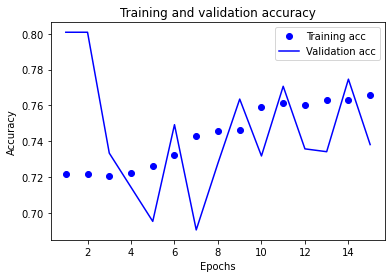

In [102]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [103]:
model.predict(x_test) 
np.round(model.predict(x_test),0) 

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [104]:
y_test # 1 and 0 (survival or not)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [105]:
# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(x_test),0)

# confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
cf_matrix


array([[ 160,  349],
       [ 101, 1280]], dtype=int64)

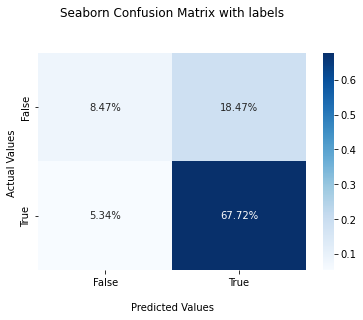

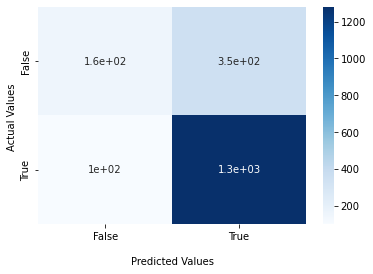

In [106]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


ax = sns.heatmap(cf_matrix, annot=True, 
            cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()